In [23]:
%pip install flatten_json pymongo pandas sklearn matplotlib np
import pandas as pd
import pymongo
import sklearn
from flatten_json import flatten
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [55]:
mongo_client = pymongo.MongoClient("mongodb://localhost:27017/")
mongo_database = mongo_client["tft_data"]
mongo_container = mongo_database["challenger"]
all_data = list(mongo_container.find().limit(10000))

In [56]:
df = pd.json_normalize(all_data, ["info", "participants"], ["metadata"])

df['played_with_parner'] = np.where(np.isnan(df['partner_group_id']), False, True)

# drop columns gold_left, last_round, level, players_eliminated, time_eliminated, total_damage_to_players, traits, units  
df = df.drop(columns=['gold_left', 'last_round', 'level', 'players_eliminated', 'time_eliminated', 'total_damage_to_players', 'traits', 'units'])

# drop columns statrting with companion
df = df.loc[:, ~df.columns.str.startswith('companion')]

df['match_id'] = df['metadata'].apply(lambda x: x['match_id'])
df = df.drop(columns=['metadata', 'partner_group_id'])

def get_augment_at_position(row, position):
    return row[position] if len(row) > position else None

# create new columns with items of augments column
df['augment_1'] = df['augments'].apply(get_augment_at_position, position=0)
df['augment_2'] = df['augments'].apply(get_augment_at_position, position=1)
df['augment_3'] = df['augments'].apply(get_augment_at_position, position=2)
df = df.drop(columns=['augments'])

# add a column "top4" that is true if placement is 1,2,3 or 4 
df['top4'] = np.where(df['placement'] <= 4, True, False)

df

,placement,puuid,played_with_parner,match_id,augment_1,augment_2,augment_3,top4
0,6,4vDKWDyLDh_efpYuChux5T41mLWrC5F5c-HQlmUDIqLXA4...,True,EUW1_6084000195,TFT6_Augment_SecondWind1,TFT6_Augment_ThrillOfTheHunt2,TFT6_Augment_Ascension,False
1,5,D0QuHbLzIsV0WwhrmsvRxZtqCdCiexXWD3UQpqmO4XAE5G...,True,EUW1_6084000195,TFT6_Augment_FirstAidKit,TFT7_Augment_LagoonOasis,TFT6_Augment_CyberneticShell2,False
2,2,_6YHT8kAvPPIUhjTgUQdPVBKLHZhBEJUx2Oa47UPCFQX8U...,True,EUW1_6084000195,TFT7_Augment_BandOfThieves1,TFT6_Augment_TomeOfTraits1,TFT7_Augment_DragonmancerEmblem,True
3,1,Rv0bOzEeDk1Afavn2a0nuFXhrhh2cEdWXxOw-cQyxGrk84...,True,EUW1_6084000195,TFT7_Augment_MageTrait,TFT6_Augment_TomeOfTraits1,TFT7_Augment_AxiomArc2,True
4,8,Az2i--gJndrpNpmwubU6nMFi54cAGFlmRG085xfF-Ehx6X...,True,EUW1_6084000195,TFT7_Augment_BandOfThieves1,TFT6_Augment_JeweledLotus,TFT7_Augment_LagoonEmblem,False
...,...,...,...,...,...,...,...,...
79995,4,t4mMnxuIshXQkQIg4hh2qnMvqkv3inzGhzcq7QkRoxe-Ke...,False,EUW1_6067715766,TFT6_Augment_ClearMind,TFT6_Augment_BandOfThieves2,TFT6_Augment_SunfireBoard,True
79996,8,R5RLhIdyM4xv25bj8SA-sZ8m6F68RMijpXYIv_kT08ouvf...,False,EUW1_6067715766,TFT6_Augment_CelestialBlessing2,TFT7_Augment_TomeOfTraits2,TFT6_Augment_SalvageBin,False
79997,6,PwabF5iLdhM2AuB8WQGU4uJkJ3H0Y-UV3k5Z0SYV1J0p3h...,False,EUW1_6067715766,TFT7_Augment_ScopedWeapons1,TFT6_Augment_RadiantRelics,TFT7_Augment_ScalescornBaseCamp,False
79998,5,EzXO5y3eSwFGnrRchK_VR0TpZBCdt70n1tVe6cd-eiSu96...,False,EUW1_6067715766,TFT6_Augment_MetabolicAccelerator,TFT6_Augment_WoodlandCharm,TFT6_Augment_PortableForge,False


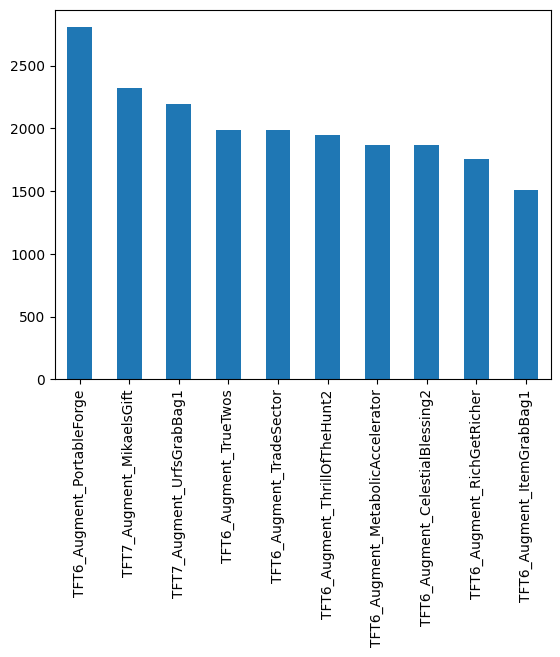

In [68]:
# plot the frequency of top 10 elements in augment_1
df['augment_1'].value_counts().head(10).plot(kind='bar')
plt.show()


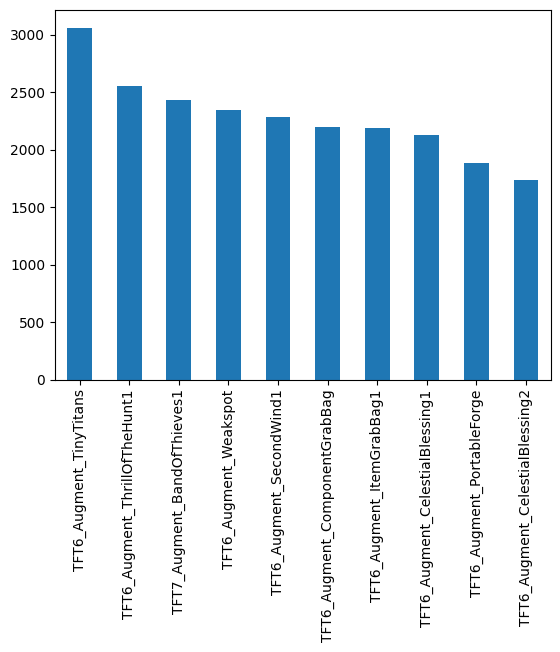

In [69]:
df['augment_2'].value_counts().head(10).plot(kind='bar')
plt.show()


<AxesSubplot: >

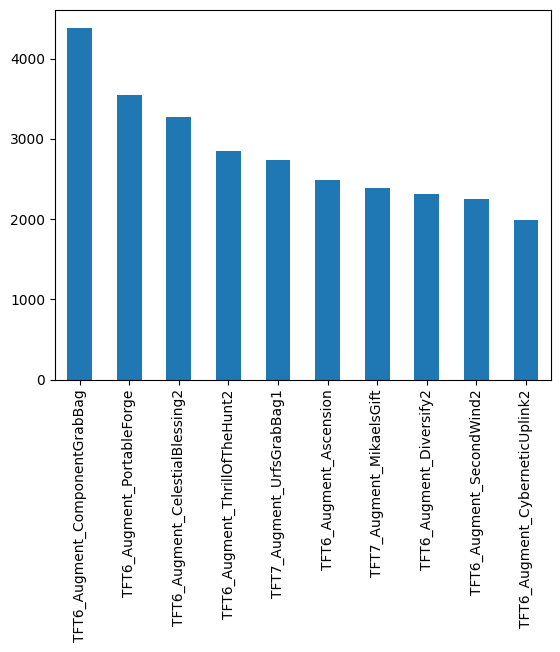

In [70]:
df['augment_3'].value_counts().head(10).plot(kind='bar')

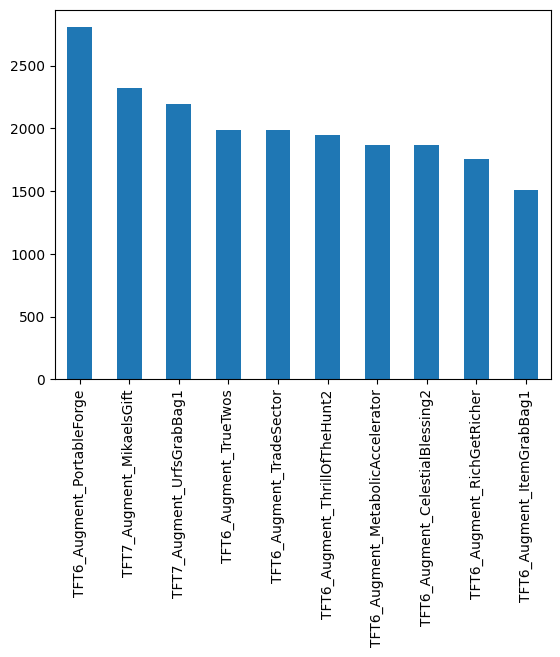

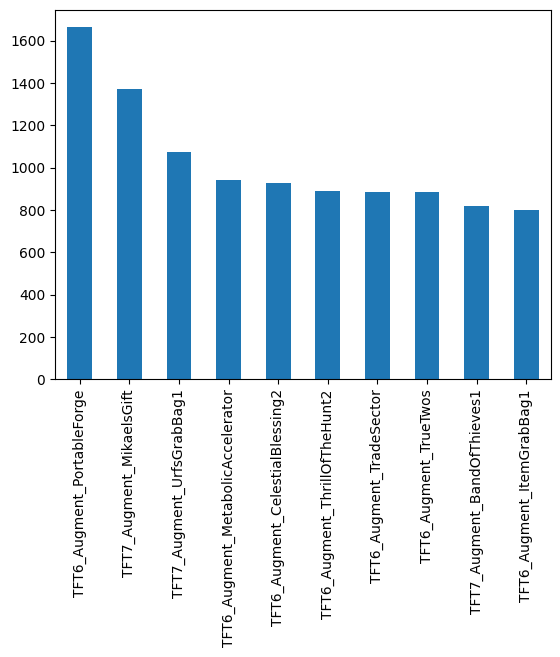

In [71]:
df['augment_1'].value_counts().head(10).plot(kind='bar')
plt.show()
df[df['top4'] == True]['augment_1'].value_counts().head(10).plot(kind='bar')
plt.show()

In [73]:
# percentage of elements in augment_1 that are in top4
df['augment_1'].value_counts().head(10) / df['augment_1'].value_counts().sum() * 100

TFT6_Augment_PortableForge           3.50500
TFT7_Augment_MikaelsGift             2.90250
TFT7_Augment_UrfsGrabBag1            2.74000
TFT6_Augment_TrueTwos                2.48625
TFT6_Augment_TradeSector             2.48125
TFT6_Augment_ThrillOfTheHunt2        2.43750
TFT6_Augment_MetabolicAccelerator    2.33375
TFT6_Augment_CelestialBlessing2      2.33375
TFT6_Augment_RichGetRicher           2.19125
TFT6_Augment_ItemGrabBag1            1.88125
Name: augment_1, dtype: float64

In [77]:
# values of augment_1 with the highest percentage in top4
d = df[df['top4'] == True]['augment_1'].value_counts().head(10) / df[df['top4'] == True]['augment_1'].value_counts().sum() * 100
display(d)
# values of augment_2 with the highest percentage in top4
d = df[df['top4'] == True]['augment_2'].value_counts().head(10) / df[df['top4'] == True]['augment_2'].value_counts().sum() * 100
display(d)
# values of augment_3 with the highest percentage in top4
d = df[df['top4'] == True]['augment_3'].value_counts().head(10) / df[df['top4'] == True]['augment_3'].value_counts().sum() * 100
display(d)

TFT6_Augment_PortableForge           4.1550
TFT7_Augment_MikaelsGift             3.4300
TFT7_Augment_UrfsGrabBag1            2.6850
TFT6_Augment_MetabolicAccelerator    2.3550
TFT6_Augment_CelestialBlessing2      2.3200
TFT6_Augment_ThrillOfTheHunt2        2.2275
TFT6_Augment_TradeSector             2.2125
TFT6_Augment_TrueTwos                2.2125
TFT7_Augment_BandOfThieves1          2.0450
TFT6_Augment_ItemGrabBag1            1.9975
Name: augment_1, dtype: float64

TFT6_Augment_TinyTitans            3.743623
TFT7_Augment_BandOfThieves1        3.258478
TFT6_Augment_Weakspot              3.103431
TFT6_Augment_ThrillOfTheHunt1      3.088427
TFT6_Augment_ComponentGrabBag      2.960888
TFT6_Augment_SecondWind1           2.755827
TFT6_Augment_CelestialBlessing1    2.628288
TFT6_Augment_ItemGrabBag1          2.573272
TFT6_Augment_PortableForge         2.463239
TFT6_Augment_CelestialBlessing2    2.343203
Name: augment_2, dtype: float64

TFT6_Augment_ComponentGrabBag      5.309624
TFT6_Augment_CelestialBlessing2    4.381753
TFT6_Augment_PortableForge         4.194178
TFT6_Augment_ThrillOfTheHunt2      3.503902
TFT7_Augment_MikaelsGift           3.426371
TFT7_Augment_UrfsGrabBag1          3.331333
TFT6_Augment_Diversify2            3.163766
TFT6_Augment_Ascension             3.108743
TFT6_Augment_CyberneticUplink2     2.693577
TFT6_Augment_SecondWind2           2.671068
Name: augment_3, dtype: float64

In [79]:
# values of augment_1 with the highest percentage in top4
d = df[df['top4'] == True]['augment_1'].value_counts().head(10) / df[df['top4'] == True]['augment_1'].value_counts().sum() * 100
display(d)
# values of augment_2 with the highest percentage in top4
d = df[df['top4'] == True]['augment_2'].value_counts().head(10) / df[df['top4'] == True]['augment_2'].value_counts().sum() * 100
display(d)
# values of augment_3 with the highest percentage in top4
d = df[df['top4'] == True]['augment_3'].value_counts().head(10) / df[df['top4'] == True]['augment_3'].value_counts().sum() * 100
display(d)

TFT6_Augment_PortableForge           4.1550
TFT7_Augment_MikaelsGift             3.4300
TFT7_Augment_UrfsGrabBag1            2.6850
TFT6_Augment_MetabolicAccelerator    2.3550
TFT6_Augment_CelestialBlessing2      2.3200
TFT6_Augment_ThrillOfTheHunt2        2.2275
TFT6_Augment_TradeSector             2.2125
TFT6_Augment_TrueTwos                2.2125
TFT7_Augment_BandOfThieves1          2.0450
TFT6_Augment_ItemGrabBag1            1.9975
Name: augment_1, dtype: float64

TFT6_Augment_TinyTitans            3.743623
TFT7_Augment_BandOfThieves1        3.258478
TFT6_Augment_Weakspot              3.103431
TFT6_Augment_ThrillOfTheHunt1      3.088427
TFT6_Augment_ComponentGrabBag      2.960888
TFT6_Augment_SecondWind1           2.755827
TFT6_Augment_CelestialBlessing1    2.628288
TFT6_Augment_ItemGrabBag1          2.573272
TFT6_Augment_PortableForge         2.463239
TFT6_Augment_CelestialBlessing2    2.343203
Name: augment_2, dtype: float64

TFT6_Augment_ComponentGrabBag      5.309624
TFT6_Augment_CelestialBlessing2    4.381753
TFT6_Augment_PortableForge         4.194178
TFT6_Augment_ThrillOfTheHunt2      3.503902
TFT7_Augment_MikaelsGift           3.426371
TFT7_Augment_UrfsGrabBag1          3.331333
TFT6_Augment_Diversify2            3.163766
TFT6_Augment_Ascension             3.108743
TFT6_Augment_CyberneticUplink2     2.693577
TFT6_Augment_SecondWind2           2.671068
Name: augment_3, dtype: float64

In [81]:
# combination of augment_1, augment_2 and augment_3 with the highest percentage in top4
d = df[df['top4'] == True][['augment_1', 'augment_2', 'augment_3']].value_counts().head(10) / df[df['top4'] == True][['augment_1', 'augment_2', 'augment_3']].value_counts().sum() * 100
display(d)

augment_1                        augment_2                      augment_3                      
TFT6_Augment_PortableForge       TFT7_Augment_BandOfThieves1    TFT6_Augment_CelestialBlessing2    0.017507
TFT6_Augment_CelestialBlessing2  TFT6_Augment_PortableForge     TFT7_Augment_FirstAidKit2          0.015006
TFT6_Augment_PortableForge       TFT6_Augment_PandorasItems     TFT6_Augment_ComponentGrabBag      0.015006
TFT7_Augment_MikaelsGift         TFT6_Augment_ComponentGrabBag  TFT6_Augment_CelestialBlessing2    0.015006
TFT6_Augment_Ascension           TFT6_Augment_PortableForge     TFT6_Augment_CelestialBlessing2    0.015006
TFT6_Augment_ItemGrabBag1        TFT7_Augment_BandOfThieves1    TFT7_Augment_MikaelsGift           0.012505
TFT6_Augment_PortableForge       TFT6_Augment_ThrillOfTheHunt1  TFT7_Augment_BandOfThieves1        0.012505
                                 TFT6_Augment_TinyTitans        TFT6_Augment_ThrillOfTheHunt2      0.012505
TFT6_Augment_Ascension           TFT6_Au

In [88]:
# train a gradient boosting classifier to predict top4 based on augment_1, augment_2 and augment_3 with one hot encoding

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = pd.get_dummies(df[['augment_1', 'augment_2', 'augment_3']])
y = df['top4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)




0.54225